In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('housing.csv')

# Preprocessing
# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Handle missing values
data.fillna(data.mean(), inplace=True)  # Impute missing values with column means

# Feature Engineering (if applicable)
data['total_rooms'] = data['total_rooms'].apply(lambda x: x if x > 0 else 1)
data['total_bedrooms'] = data['total_bedrooms'].apply(lambda x: x if x > 0 else 1)
data['households_rooms'] = data['households'] / data['total_rooms']  # Example feature

# Split the data into features and target
X = data.drop(columns='median_house_value')  # Assuming 'median_house_value' is your target variable
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict with Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
linear_r2_score = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression R^2 Score: {linear_r2_score:.4f}")
print(f"Linear Regression Mean Squared Error: {linear_mse:.4f}")

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_r2_score = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R^2 Score: {rf_r2_score:.4f}")
print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")

Linear Regression R^2 Score: 0.6594
Linear Regression Mean Squared Error: 4221276317.4875
Random Forest R^2 Score: 0.8406
Random Forest Mean Squared Error: 1975219618.2772


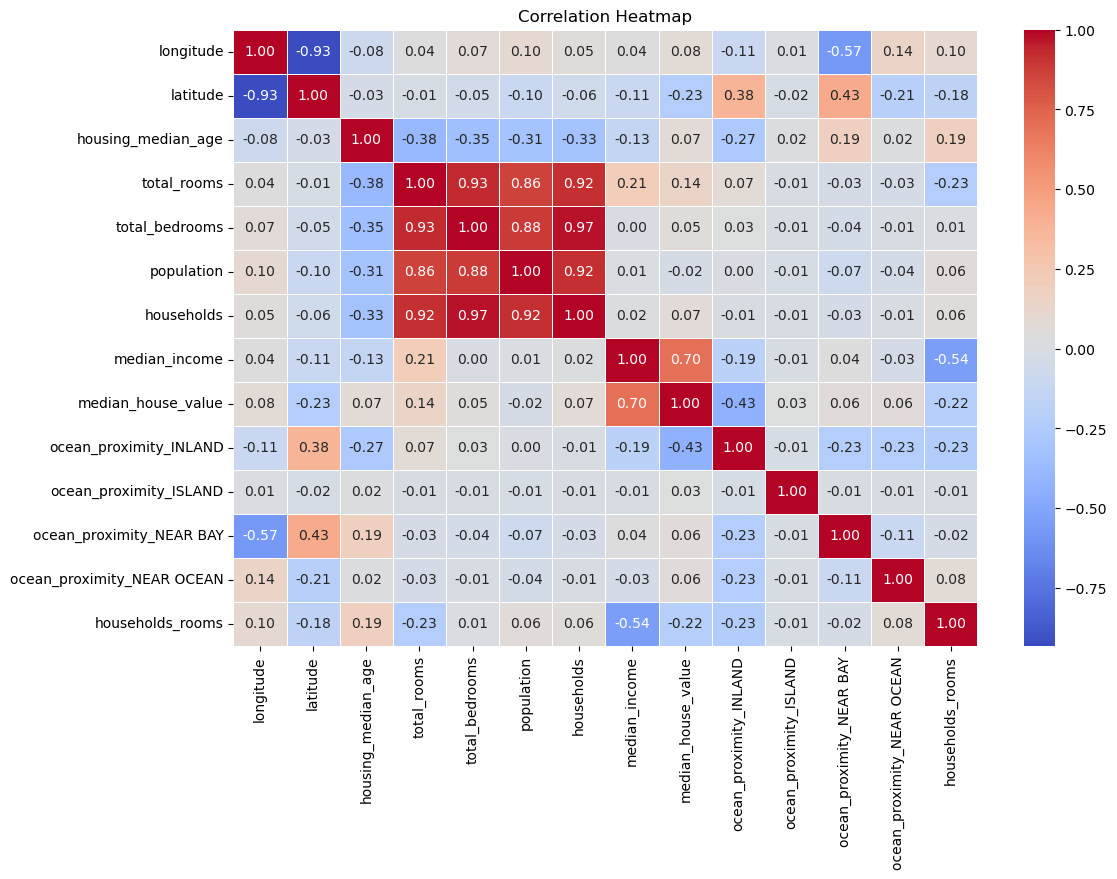

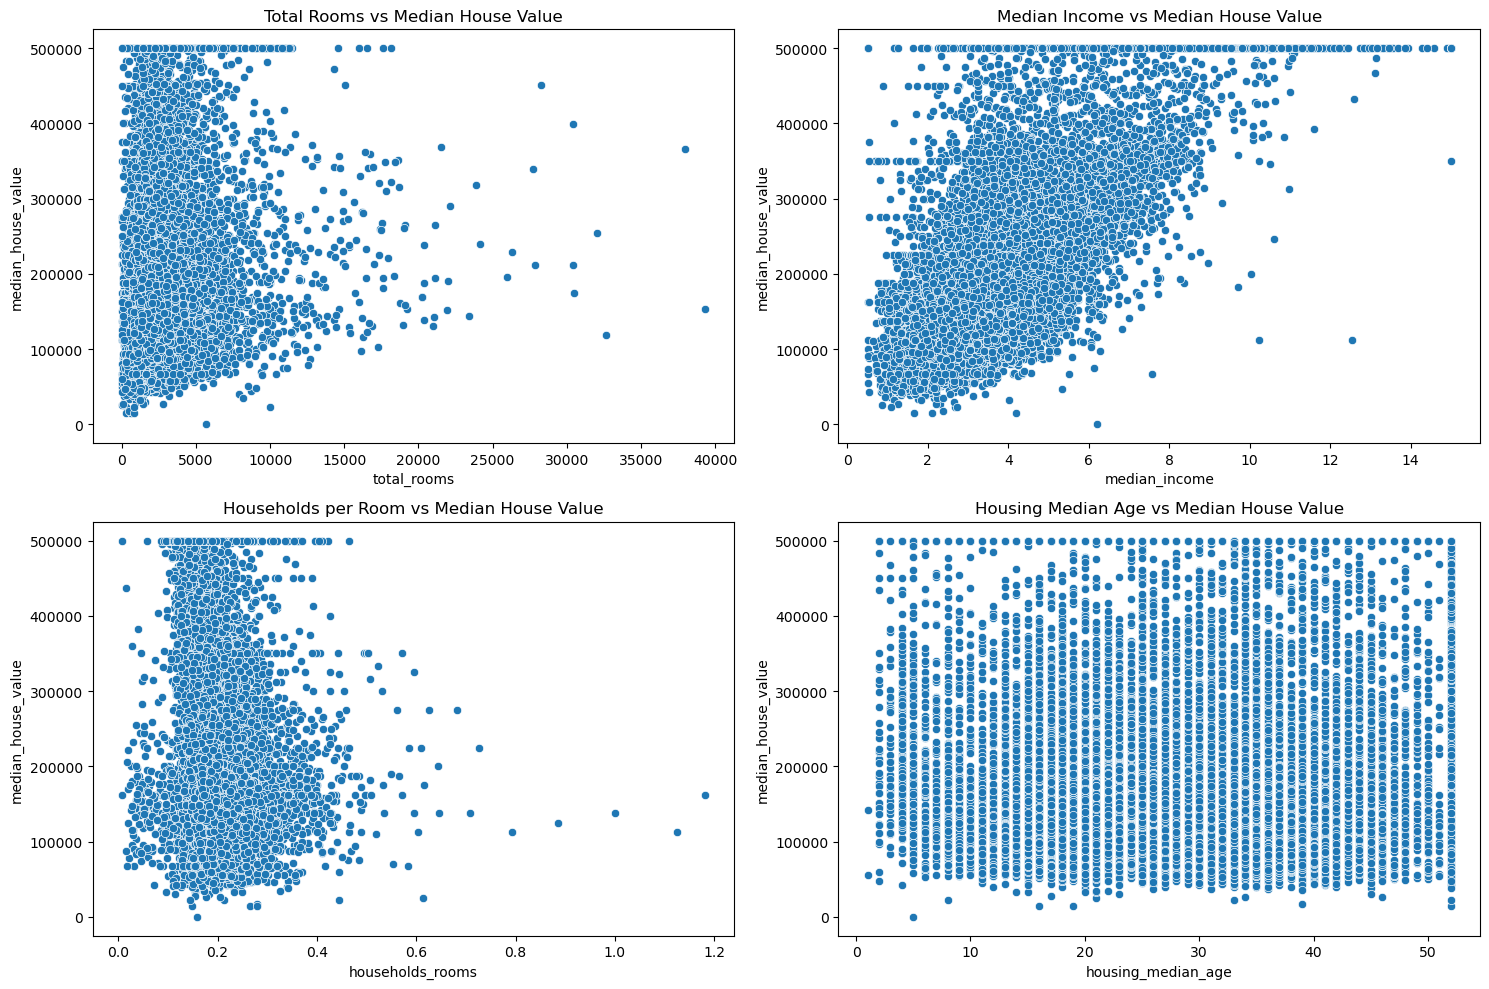

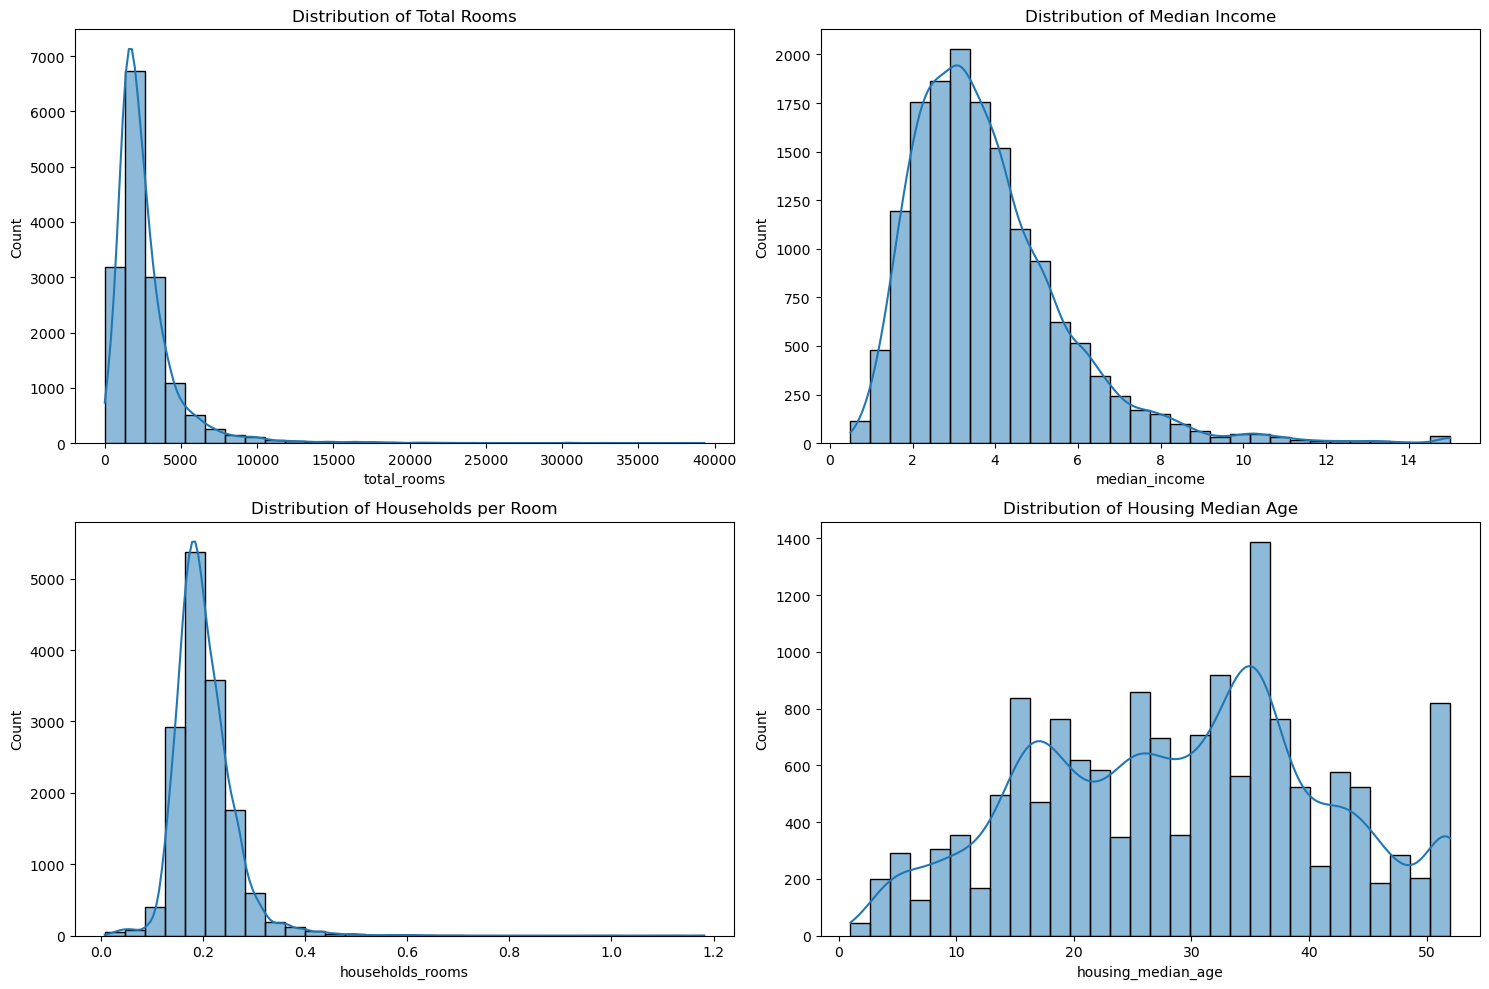

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('housing.csv')

# Preprocessing
# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Handle missing values
data.fillna(data.mean(), inplace=True)  # Impute missing values with column means

# Feature Engineering (if applicable)
data['total_rooms'] = data['total_rooms'].apply(lambda x: x if x > 0 else 1)
data['total_bedrooms'] = data['total_bedrooms'].apply(lambda x: x if x > 0 else 1)
data['households_rooms'] = data['households'] / data['total_rooms']  # Example feature

# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatterplots
plt.figure(figsize=(15, 10))

# Example scatterplots
plt.subplot(2, 2, 1)
sns.scatterplot(x='total_rooms', y='median_house_value', data=data)
plt.title('Total Rooms vs Median House Value')

plt.subplot(2, 2, 2)
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs Median House Value')

plt.subplot(2, 2, 3)
sns.scatterplot(x='households_rooms', y='median_house_value', data=data)
plt.title('Households per Room vs Median House Value')

plt.subplot(2, 2, 4)
sns.scatterplot(x='housing_median_age', y='median_house_value', data=data)
plt.title('Housing Median Age vs Median House Value')

plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(15, 10))

# Example histograms
plt.subplot(2, 2, 1)
sns.histplot(data['total_rooms'], bins=30, kde=True)
plt.title('Distribution of Total Rooms')

plt.subplot(2, 2, 2)
sns.histplot(data['median_income'], bins=30, kde=True)
plt.title('Distribution of Median Income')

plt.subplot(2, 2, 3)
sns.histplot(data['households_rooms'], bins=30, kde=True)
plt.title('Distribution of Households per Room')

plt.subplot(2, 2, 4)
sns.histplot(data['housing_median_age'], bins=30, kde=True)
plt.title('Distribution of Housing Median Age')

plt.tight_layout()
plt.show()


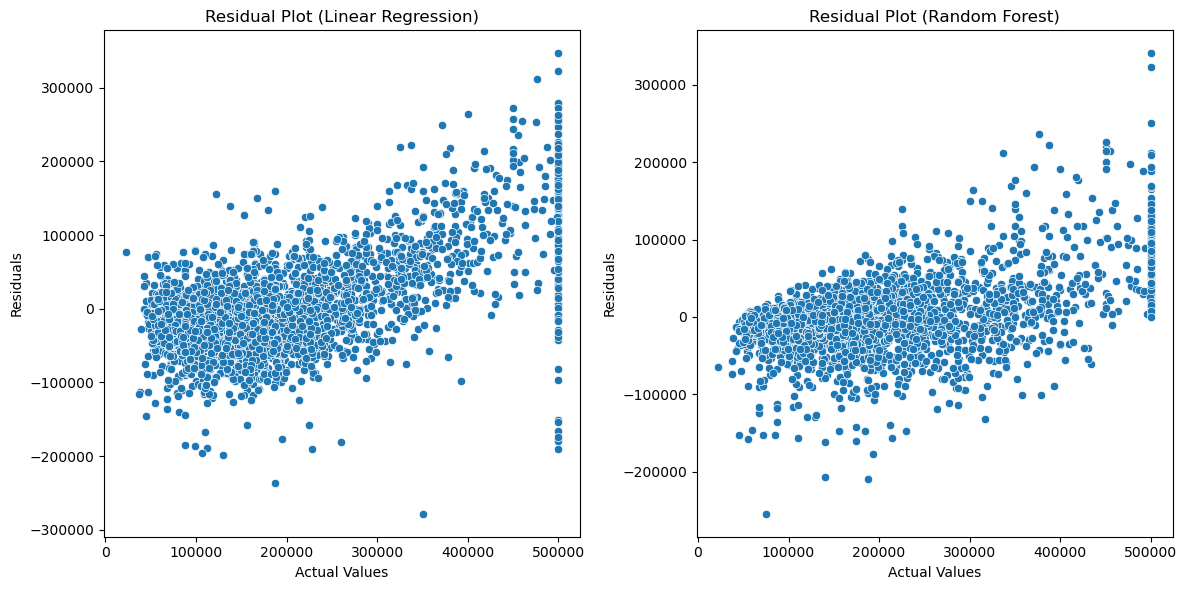

In [5]:
# Residual plots for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_test - y_pred_linear)
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Residual plots for Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test - y_pred_rf)
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


/var/folders/xv/fn5b8dr14_x580tbd_h5hxm40000gn/T/ipykernel_5843/3260240922.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


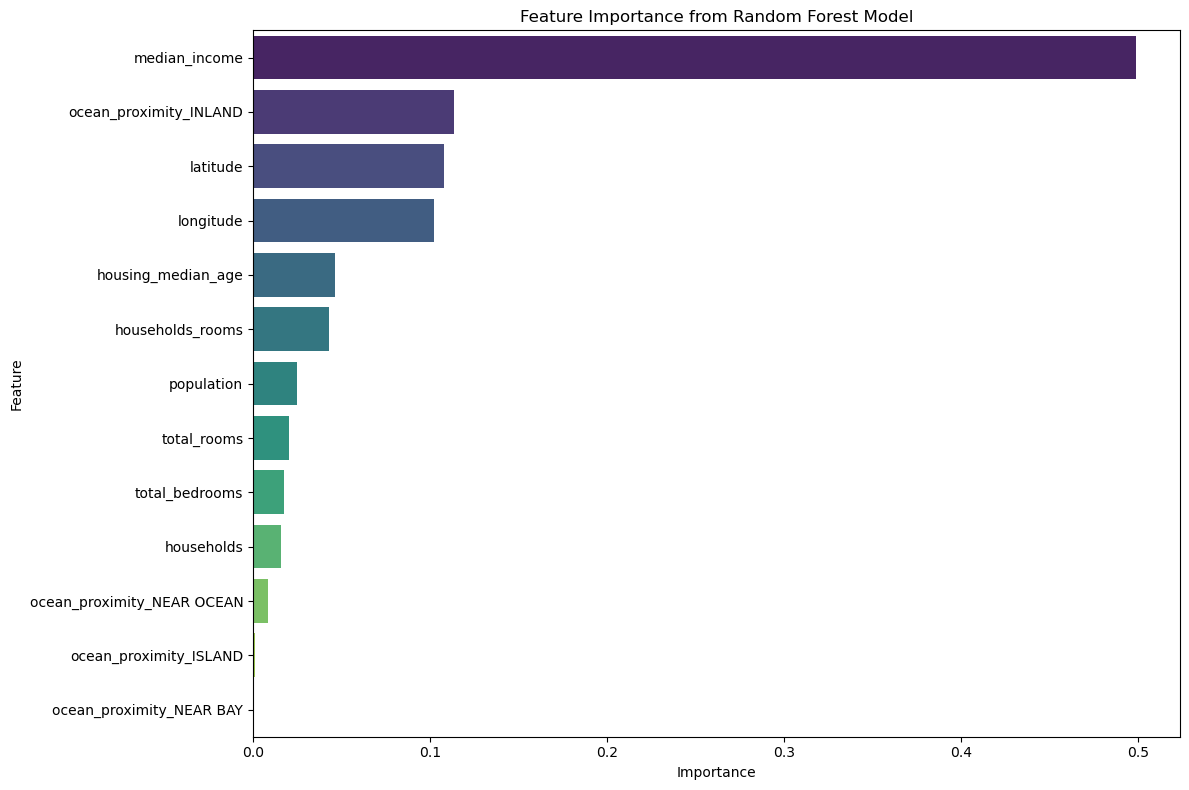

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `rf_model` is your trained Random Forest model and `X` is your feature set
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
plt.savefig('feature_importance.png')
plt.show()


/var/folders/xv/fn5b8dr14_x580tbd_h5hxm40000gn/T/ipykernel_5843/1957085163.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=metrics_df, palette='coolwarm')
/var/folders/xv/fn5b8dr14_x580tbd_h5hxm40000gn/T/ipykernel_5843/1957085163.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Squared Error', data=metrics_df, palette='coolwarm')


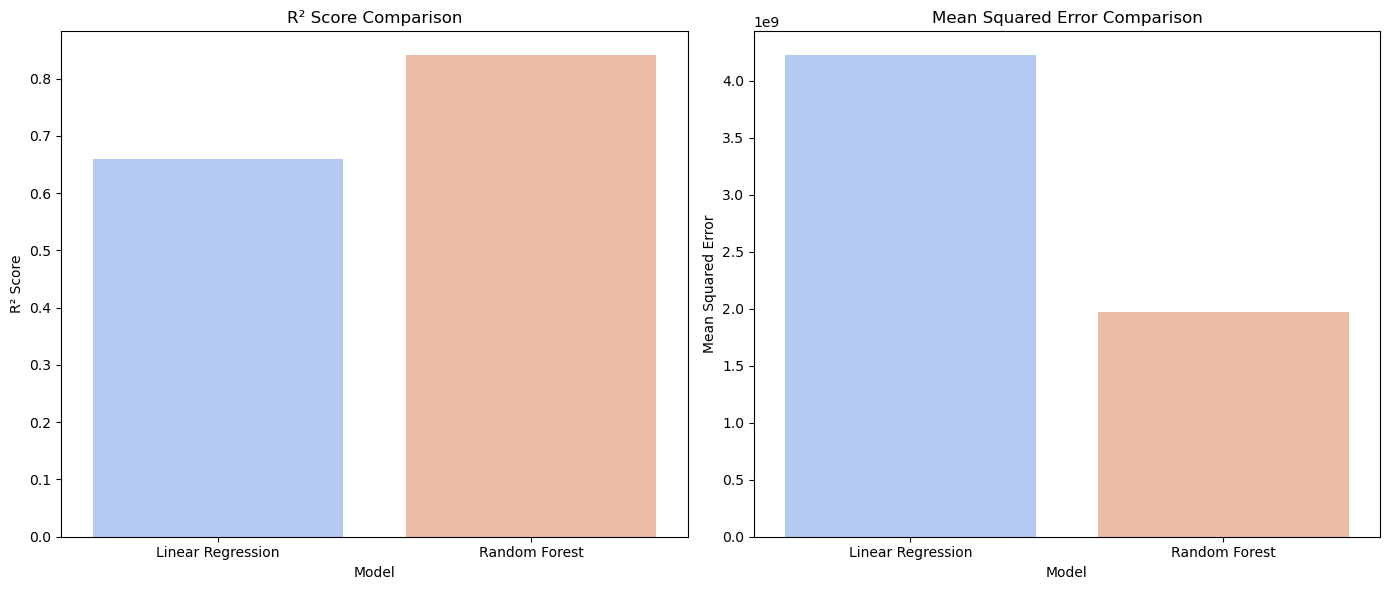

In [8]:
# Assuming you have already computed these metrics
metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [linear_r2_score, rf_r2_score],
    'Mean Squared Error': [linear_mse, rf_mse]
}

metrics_df = pd.DataFrame(metrics)

# Plot R² Scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R² Score', data=metrics_df, palette='coolwarm')
plt.title('R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')

# Plot MSE Values
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Mean Squared Error', data=metrics_df, palette='coolwarm')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')

plt.tight_layout()

# Save the plot
plt.savefig('performance_comparison.png')
plt.show()


In [11]:
data=pd.read_csv("housing.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15062 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
 9   ocean_proximity     15209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


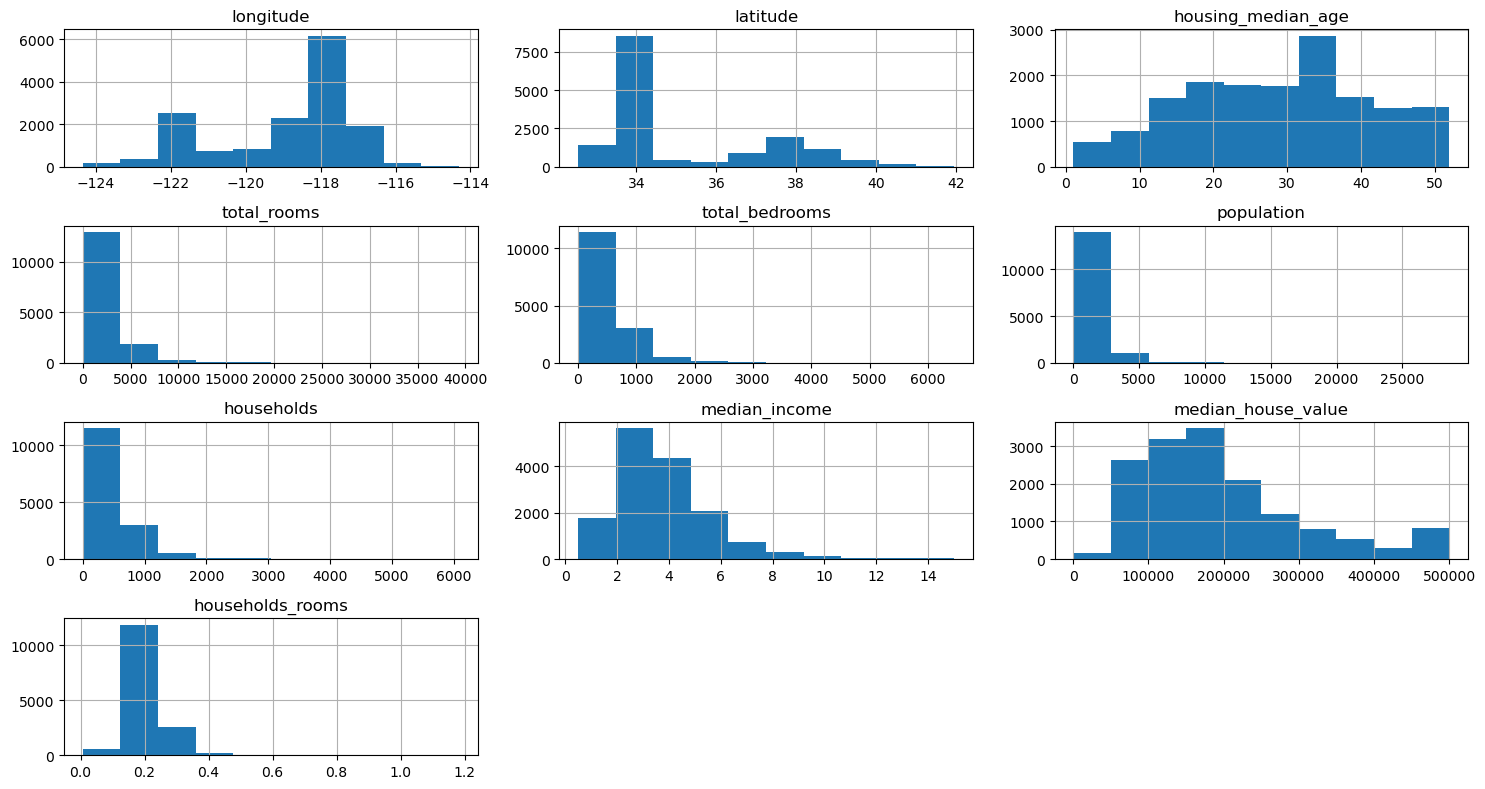

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('housing.csv')

# Preprocessing (if needed)
# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Feature Engineering (if applicable)
data['total_rooms'] = data['total_rooms'].apply(lambda x: x if x > 0 else 1)
data['total_bedrooms'] = data['total_bedrooms'].apply(lambda x: x if x > 0 else 1)
data['households_rooms'] = data['households'] / data['total_rooms']

# Plot histograms for all features in the dataset
data.hist(figsize=(15, 8))
plt.tight_layout()
plt.show()
